In [28]:
import csv
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import powerlaw as pwl
import seaborn as sns; sns.set()

from os import listdir
from os.path import isfile, isdir, join, exists

In [29]:
plt.rcParams['figure.figsize'] = [10,5]
plt.rcParams['patch.force_edgecolor'] = True
plt.rcParams['font.size'] = 14

In [44]:
datasetpath = '../../src/datasets/'
data = [ f for f in listdir(datasetpath) if isdir(join(datasetpath, f))] 
data
#filename = '../../src/datasets/EmailEUCore/EmailEUCore.csv'

['Emailcontacts',
 'EmailURV',
 'EmailEUCore',
 'POK',
 'AdultIMDB',
 'LesMiserables']

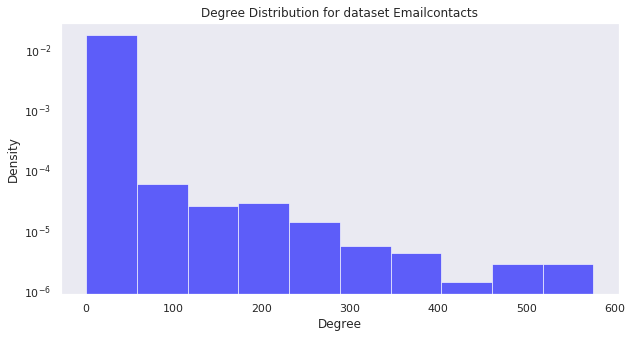

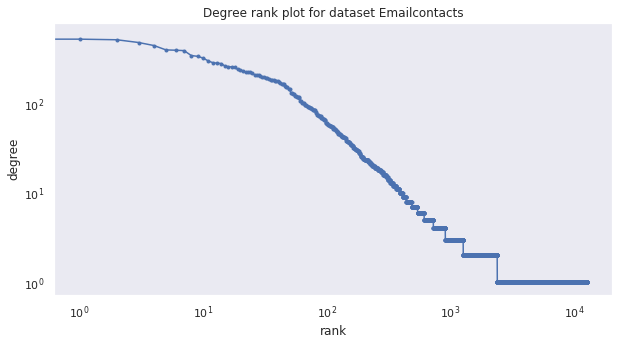

Calculating best minimal value for power law fit
/home/nik/.pyenv/versions/3.6.3/envs/memoryjupyter/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


alpha: 1.9059814868124552
sigma: 0.030099218827125872
compare: (606.0696120506049, 2.9845624938967804e-42)


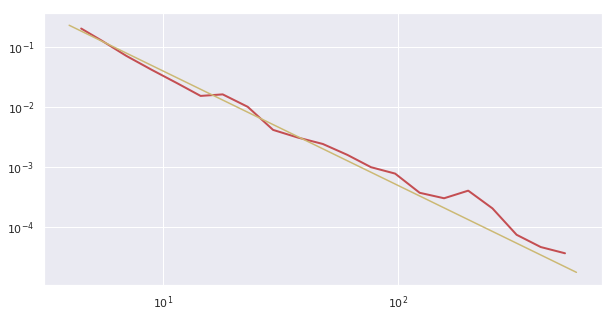

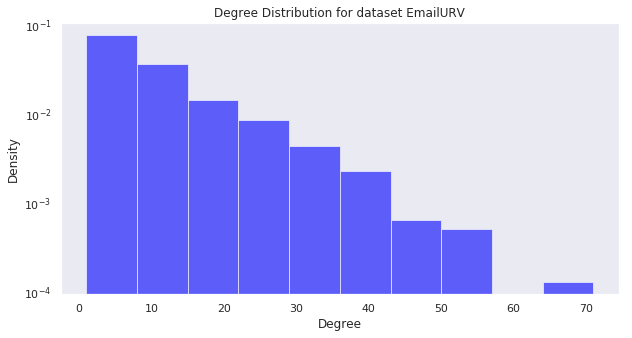

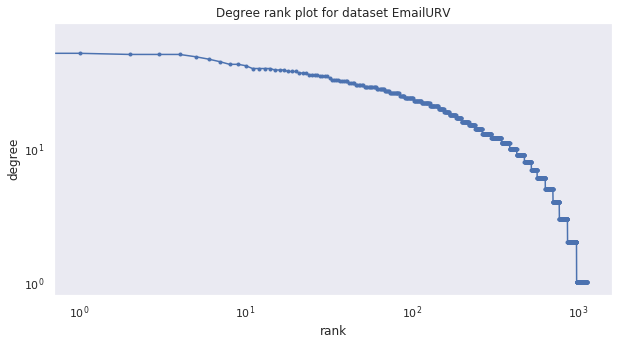

Calculating best minimal value for power law fit


alpha: 7.281720557527611
sigma: 1.1104618009366782
compare: (0.29523372208322396, 0.7046722258432918)


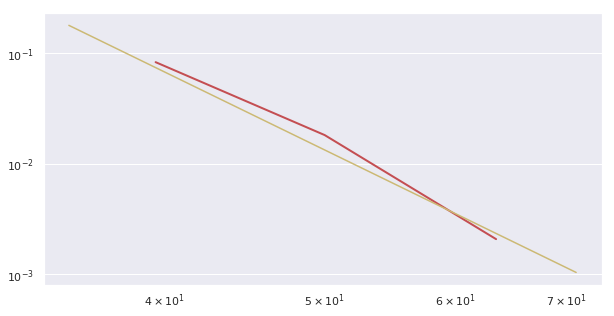

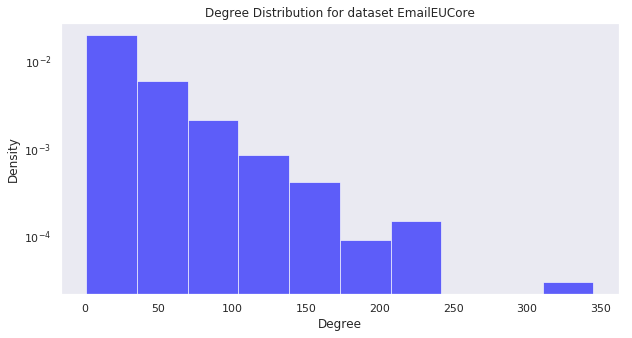

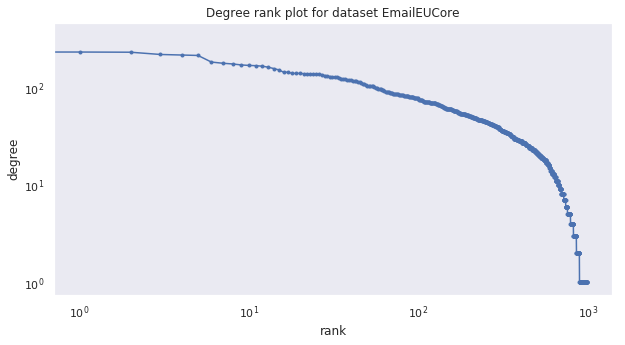

Calculating best minimal value for power law fit


alpha: 5.465623837702577
sigma: 0.7548281972902839
compare: (0.7450585926715538, 0.5297006128198736)


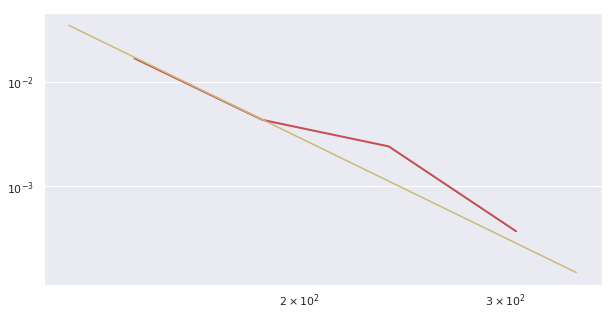

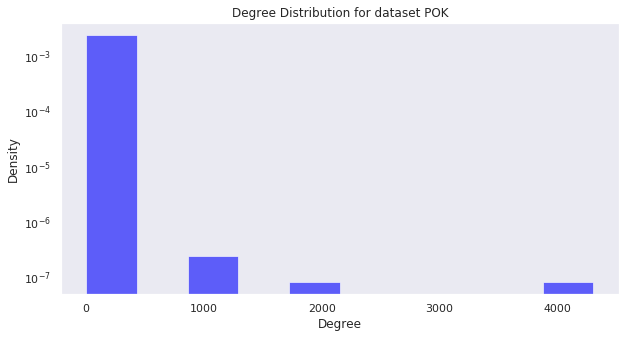

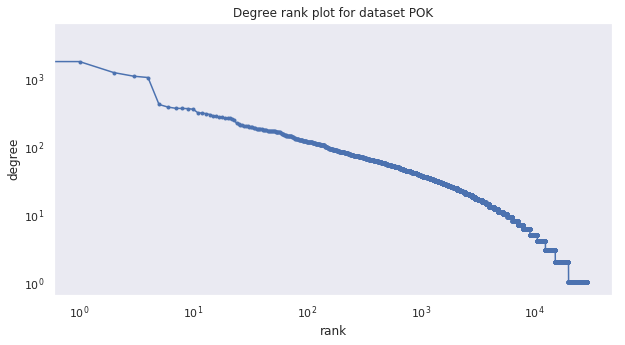

Calculating best minimal value for power law fit
/home/nik/.pyenv/versions/3.6.3/envs/memoryjupyter/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


alpha: 3.109240810210785
sigma: 0.08191612525541418
compare: (205.84720682222672, 0.00967629104781281)


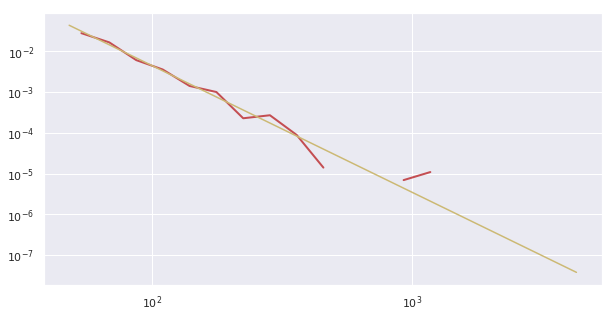

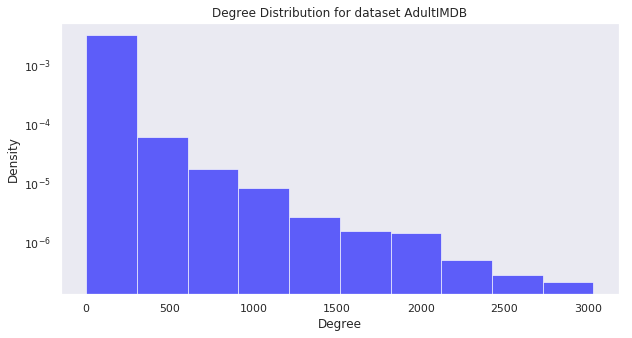

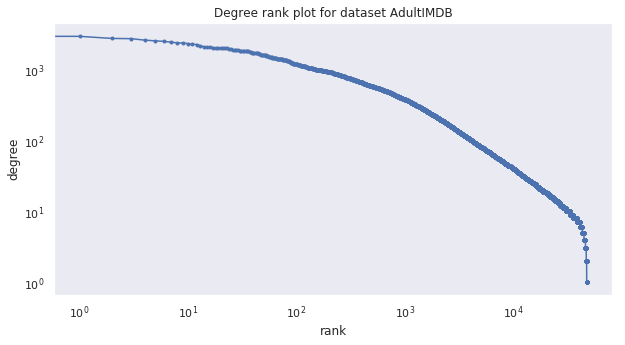

Calculating best minimal value for power law fit


alpha: 2.0219649163441558
sigma: 0.009034037769361373
compare: (3545.804664991453, 1.8361434628513433e-169)


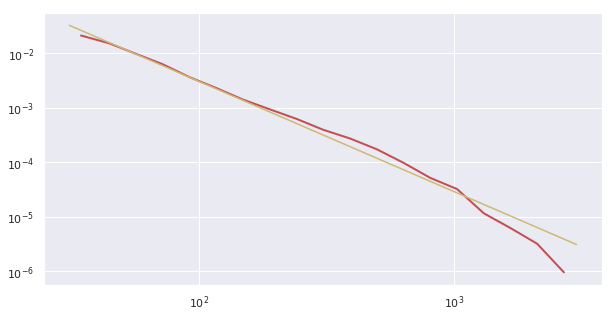

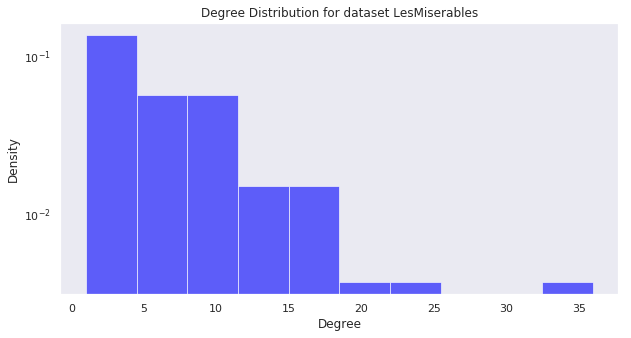

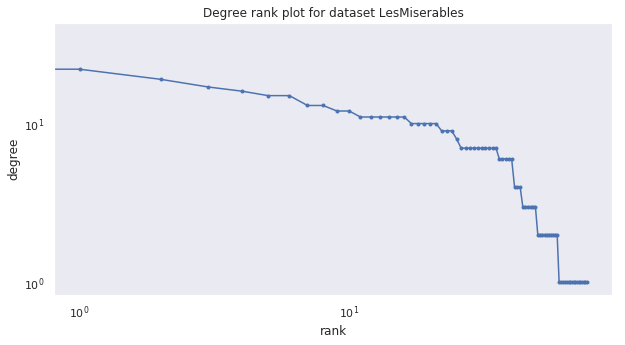

Calculating best minimal value for power law fit


alpha: 4.676446068433942
sigma: 0.7838209354328841
compare: (1.9946186329990971, 0.1815076682248985)


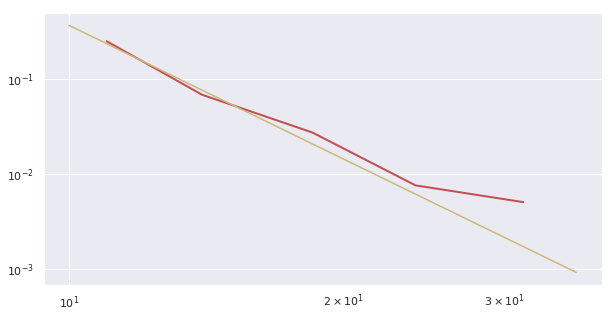

In [57]:
for dataset in data:
    G = nx.Graph()
    with open(join(datasetpath,dataset,dataset+'.csv'), 'r') as file:
        reader = csv.reader(file, delimiter=",")
        for row in reader:
            G.add_edge(int(row[0]), int(row[1]))

    degrees = [G.degree(n) for n in G.nodes()]
    n_bins = 10
    plt.figure()
    plt.grid()
    n, bins, patches = plt.hist(degrees, n_bins, density=1, facecolor='blue', alpha=0.6)
    #plt.plot(n, bins)

    plt.title("Degree Distribution for dataset "+dataset)
    plt.xlabel('Degree')
    plt.ylabel('Density')
    plt.yscale('log', nonposy='clip')
    plt.savefig(join('/home/nik/Documents/masterthesis/img/pdf',dataset+'DegreeDist.pdf'))
    plt.show()
    
    plt.figure()
    plt.grid()
    degree_sequence=sorted(list(dict(nx.degree(G)).values()),reverse=True) # degree sequence
    #print "Degree sequence", degree_sequence
    dmax=max(degree_sequence)

    plt.loglog(degree_sequence,'b',marker='.')
    
    plt.title("Degree rank plot for dataset "+dataset)
    plt.ylabel("degree")
    plt.xlabel("rank")
    plt.show()
    
    plt.figure()
    dat = degree_sequence
    fit = powerlaw.Fit(dat)
    print("alpha:", fit.power_law.alpha)
    print("sigma:", fit.power_law.sigma)
    print("compare:", fit.distribution_compare('power_law', 'exponential'))

    fig2=fit.plot_pdf(color='r', linewidth=2)
    fit.power_law.plot_pdf(color='y', linestyle='-',ax=fig2)
    